In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
url = 'https://www.datahubbs.com/wp-content/uploads/2017/03/timeseries.csv'

In [3]:
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df.head()
df


,date,sales
0,2015-01-01,106
1,2015-01-02,122
2,2015-01-03,127
3,2015-01-04,106
4,2015-01-05,89
...,...,...
725,2016-12-26,102
726,2016-12-27,120
727,2016-12-28,121
728,2016-12-29,133


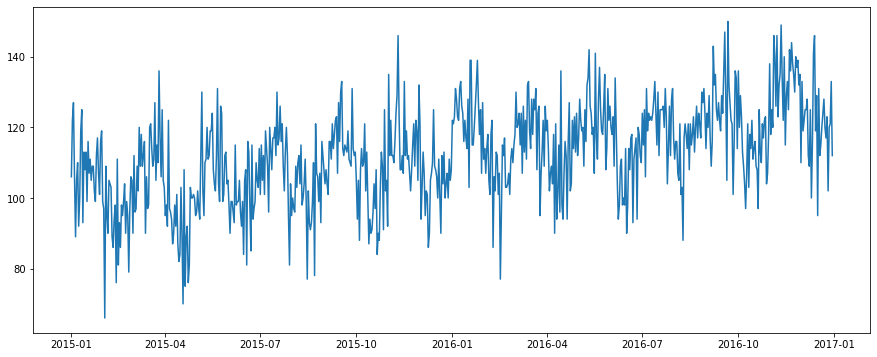

In [4]:
plt.figure(figsize=(15,6))
plt.title='Sales'
plt.plot(df['date'], df['sales'], label= 'Sales')
plt.show()


In [5]:
n= len(df)
train_count= round(n*0.75)
print(train_count)
train = df.iloc[:train_count]
test= df.iloc[train_count+ 1:n]

548


In [6]:
train

,date,sales
0,2015-01-01,106
1,2015-01-02,122
2,2015-01-03,127
3,2015-01-04,106
4,2015-01-05,89
...,...,...
543,2016-06-27,120
544,2016-06-28,118
545,2016-06-29,112
546,2016-06-30,110


In [7]:
test

,date,sales
549,2016-07-03,125
550,2016-07-04,106
551,2016-07-05,131
552,2016-07-06,119
553,2016-07-07,124
...,...,...
725,2016-12-26,102
726,2016-12-27,120
727,2016-12-28,121
728,2016-12-29,133


# Naive 
Estimating technique in which the last period's actuals are used as this period's forecast, without adjusting them or attempting to establish causal factors.


In [8]:

y_hat = test.copy().drop('sales', axis=1)
y_hat['date'] = y_hat['date'] + np.timedelta64(1, "D")
y_hat['naive'] = train.loc[len(train)-1, 'sales']


In [9]:
y_hat

,date,naive
549,2016-07-04,124
550,2016-07-05,124
551,2016-07-06,124
552,2016-07-07,124
553,2016-07-08,124
...,...,...
725,2016-12-27,124
726,2016-12-28,124
727,2016-12-29,124
728,2016-12-30,124


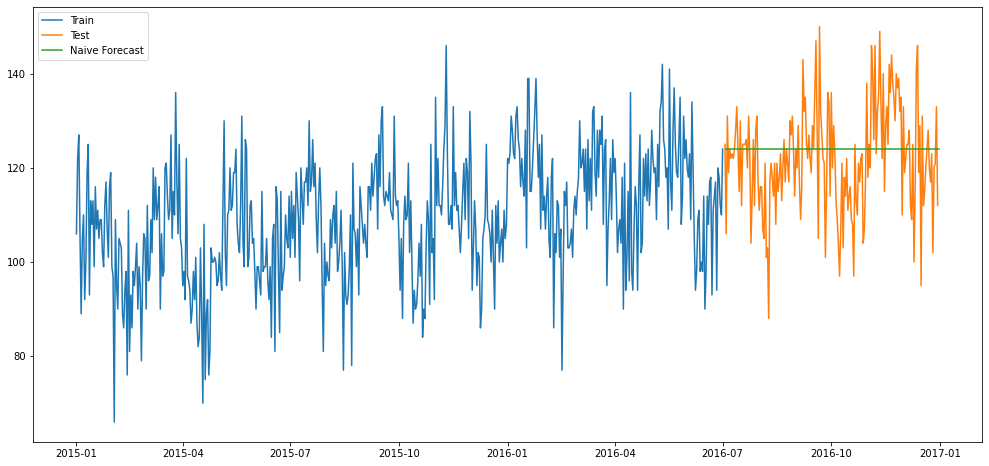

In [10]:
plt.figure(figsize=(17,8))
plt.plot(train['date'], train['sales'], label='Train')
plt.plot(test['date'], test['sales'], label='Test')
plt.plot(y_hat['date'], y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.show()

## Seasonal


In [11]:
dates = (test['date'] - np.timedelta64(1, 'Y')).values.astype('datetime64[D]')
seasonal = train[train['date'].isin(dates)]['sales'] 
y_hat_sn = test.copy().drop('sales', axis=1)
y_hat_sn['seasonal'] = pd.DataFrame(seasonal).set_index(test.index)
y_hat_sn.head()


,date,seasonal
549,2016-07-03,105
550,2016-07-04,112
551,2016-07-05,101
552,2016-07-06,119
553,2016-07-07,114


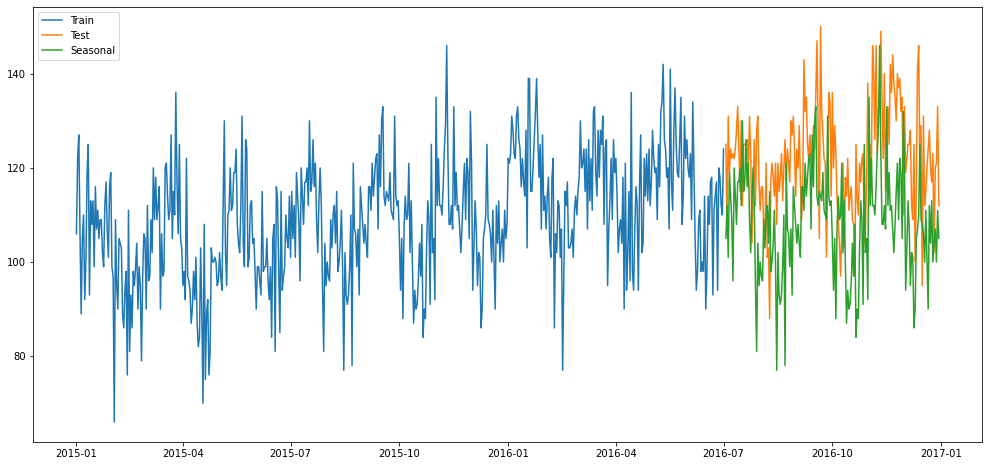

In [12]:
plt.figure(figsize=(17,8))
plt.plot(train['date'], train['sales'], label='Train')
plt.plot(test['date'], test['sales'], label='Test')
plt.plot(y_hat_sn['date'], y_hat_sn['seasonal'], label='Seasonal')
plt.legend(loc='best')
plt.show()

In [13]:
from statsmodels.tools.eval_measures import rmse
rmse_error = rmse(y_hat_sn['seasonal'], test['sales'])


In [14]:
rmse_error

19.856390485028307

In [15]:
mape = np.mean(np.abs((y_hat_sn['seasonal']- test['sales']) / test['sales'])) * 100

In [16]:
mape

13.604798220280953